In [1]:
import numpy as np
import pandas as pd
from speedboot import speedboot

##### You are given a random sample of size n from a population

In [14]:
n = 200
np.random.seed(0)
n_sample = pd.DataFrame({"age": np.random.normal(50,10,n),
                         "height": np.random.normal(1.7,.2,n),
                         "weight": np.random.normal(65,10,n)})
n_sample.head()

,age,height,weight
0,67.640523,1.626164,59.013461
1,54.001572,1.652124,53.841030
2,59.787380,1.919932,72.666632
3,72.408932,1.831053,68.562928
4,68.675580,1.828026,47.314615


##### Using this sample you wish to estimate the mean age and mean BMI for the population form which we are sampling

In [3]:
def estimators(X):
    '''Estimators for the mean age and mean BMI of a population'''
    return np.array([np.mean(X['age']), np.mean(X['weight']/X['height']**2)])

(age_hat, bmi_hat) = estimators(n_sample)

print(f'estimated mean age is {age_hat:.2f}')
print(f'estimated mean BMI is {bmi_hat:.2f}')

estimated mean age is 50.71
estimated mean BMI is 23.57


##### Instanciate speedboot with the sample and the estimator function

In [4]:
speedboot_object = speedboot(data=n_sample, stats_fun=estimators)

##### Run the bootstrap with 999 iterations

In [5]:
speedboot_object.fit(R=999, bar=True, seed=123)

100%|██████████| 999/999 [00:00<00:00, 1962.50it/s]


##### Parallelize computations for speed

In [6]:
speedboot_object.fit(R=999, bar=True, par=True, seed=123)

100%|██████████| 999/999 [00:01<00:00, 838.24it/s]


##### Recover point estimates

In [7]:
speedboot_object.ests

array([50.70910493, 23.56687578])

##### Recover bootstrap estimates stored in .ests_boot

In [8]:
pd.DataFrame(speedboot_object.ests_boot, columns=['age_hats', 'BMI_hats'])

,age_hats,BMI_hats
0,51.991845,23.579462
1,51.352808,22.922220
2,50.883572,23.215851
3,50.560021,23.727509
4,50.268339,23.384304
...,...,...
994,51.932897,24.044961
995,50.987550,23.388086
996,50.303962,23.460349
997,50.664052,22.849728


##### Plot histograms for normality check

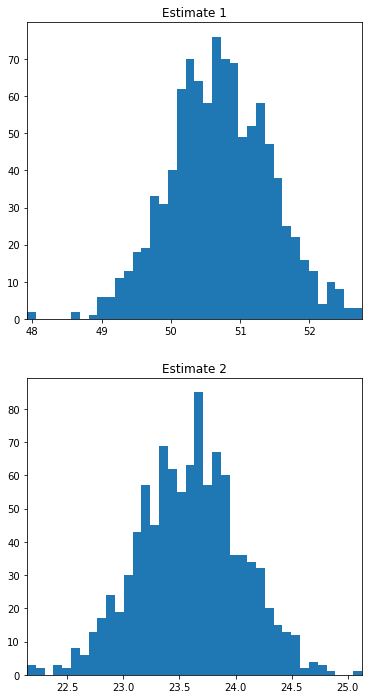

In [9]:
speedboot_object.plot(prec=.04, size=6)

##### Compute 90% percentile confidence intervals

In [10]:
speedboot_object.per_ci(alpha=.1)

array([[49.47669955, 51.93012242],
       [22.81695916, 24.34148925]])

##### Compute 90% empirical confidence intervals

In [11]:
speedboot_object.emp_ci(alpha=.1)

array([[49.48808744, 51.94151032],
       [22.79226231, 24.3167924 ]])

##### To compute BCa confidence intervals, you need to run the jackknife first

In [12]:
speedboot_object.jackknife(bar=True, par=True)

100%|██████████| 200/200 [00:00<00:00, 1871.94it/s]


##### Compute 90% BCa confidence intervals

In [13]:
speedboot_object.bca_ci(alpha=.1)

array([[49.50791565, 51.93559845],
       [22.76933923, 24.27196674]])